In [1]:
from pythtb import TBModel, WFArray, Mesh
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def set_model(t, dt, soc):

  # set up Fu-Kane-Mele model
  lat = [[0, 1/2, 1/2], [1/2, 0, 1/2],[1/2, 1/2, 0]]
  orb = [[0, 0, 0],[1/4, 1/4, 1/4]]
  model = TBModel(dim_k=3, dim_r=3, lat=lat, orb=orb, nspin=2)

  # spin-independent first-neighbor hops
  for lvec in ([0,0,0],[-1,0,0],[0,-1,0],[0,0,-1]):
    model.set_hop(t,0,1,lvec)
  model.set_hop(dt,0,1,[0,0,0],mode="add")

  # spin-dependent second-neighbor hops
  lvec_list=([1,0,0],[0,1,0],[0,0,1],[-1,1,0],[0,-1,1],[1,0,-1])
  dir_list=([0,1,-1],[-1,0,1],[1,-1,0],[1,1,0],[0,1,1],[1,0,1])
  for j in range(6):
    spin=np.array([0.]+dir_list[j])
    model.set_hop( 1.j*soc*spin,0,0,lvec_list[j])
    model.set_hop(-1.j*soc*spin,1,1,lvec_list[j])

  return model

In [3]:
t = 1.0      # spin-independent first-neighbor hop
dt = 0.4     # modification to t for (111) bond
soc= 0.125  # spin-dependent second-neighbor hop

my_model = set_model(t,dt,soc)
print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 3
k-space dimension           = 3
number of spin components   = 2
periodic directions         = [0, 1, 2]
number of orbitals          = 2
number of electronic states = 4

Lattice vectors (Cartesian):
  # 0 ===> [   0   ,  0.500 ,  0.500 ]
  # 1 ===> [ 0.500 ,    0   ,  0.500 ]
  # 2 ===> [ 0.500 ,  0.500 ,    0   ]
Orbital vectors (dimensionless):
  # 0 ===> [   0   ,    0   ,    0   ]
  # 1 ===> [ 0.250 ,  0.250 ,  0.250 ]
Site energies:
  # 0 ===> [[0.+0.j 0.+0.j]  [0.+0.j 0.+0.j]]
  # 1 ===> [[0.+0.j 0.+0.j]  [0.+0.j 0.+0.j]]
Hoppings:
  < 0 | H | 1 + [ 0.0 ,  0.0 ,  0.0 ] >  ===> [[1.4+0.j 0. +0.j]  [0. +0.j 1.4+0.j]]
  < 0 | H | 1 + [-1.0 ,  0.0 ,  0.0 ] >  ===> [[1.+0.j 0.+0.j]  [0.+0.j 1.+0.j]]
  < 0 | H | 1 + [ 0.0 , -1.0 ,  0.0 ] >  ===> [[1.+0.j 0.+0.j]  [0.+0.j 1.+0.j]]
  < 0 | H | 1 + [ 0.0 ,  0.0 , -1.0 ] >  ===> [[1.+0.j 

In [4]:
path = [
    [0,0,0], [0, 1/2, 1/2], [1/4, 5/8, 5/8],
    [1/2, 1/2, 1/2],[3/4, 3/8, 3/8],[1/2, 0, 0]
    ]
label = (r'$\Gamma$',r'$X$',r'$U$',r'$L$',r'$K$',r'$L^\prime$')
(k_vec, k_dist, k_node) = my_model.k_path(path, 101)

evals = my_model.solve_ham(k_vec)

----- k_path report -----
Real-space lattice vectors:
 [[0.  0.5 0.5]
 [0.5 0.  0.5]
 [0.5 0.5 0. ]]
K-space metric tensor:
 [[ 3. -1. -1.]
 [-1.  3. -1.]
 [-1. -1.  3.]]
Nodes (reduced coords):
 [[0.    0.    0.   ]
 [0.    0.5   0.5  ]
 [0.25  0.625 0.625]
 [0.5   0.5   0.5  ]
 [0.75  0.375 0.375]
 [0.5   0.    0.   ]]
Reciprocal-space vectors:
 [[-1.  1.  1.]
 [ 1. -1.  1.]
 [ 1.  1. -1.]]
Nodes (Cartesian coords):
 [[ 0.    0.    0.  ]
 [ 1.    0.    0.  ]
 [ 1.    0.25  0.25]
 [ 0.5   0.5   0.5 ]
 [ 0.    0.75  0.75]
 [-0.5   0.5   0.5 ]]
Segments:
  Node 0 [0. 0. 0.] to Node 1 [0.  0.5 0.5]: distance = 1.00000
  Node 1 [0.  0.5 0.5] to Node 2 [0.25  0.625 0.625]: distance = 0.35355
  Node 2 [0.25  0.625 0.625] to Node 3 [0.5 0.5 0.5]: distance = 0.61237
  Node 3 [0.5 0.5 0.5] to Node 4 [0.75  0.375 0.375]: distance = 0.61237
  Node 4 [0.75  0.375 0.375] to Node 5 [0.5 0.  0. ]: distance = 0.61237
Node distances (cumulative): [0.      1.      1.35355 1.96593 2.5783  3.19067]
Node 

(-4.9, 4.9)

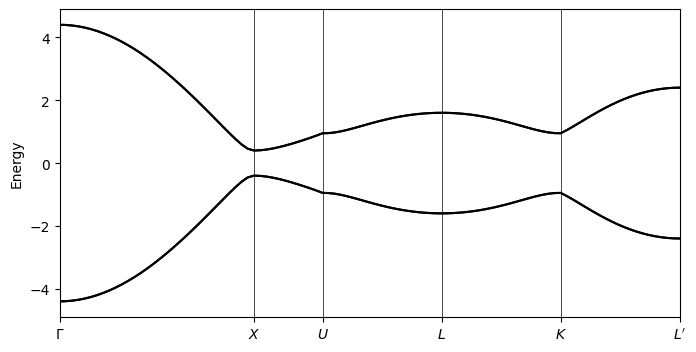

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(k_dist, evals, color='k')

ax.set_xlim([0, k_node[-1]])
ax.set_xticks(k_node)
ax.set_xticklabels(label)
for n in range(len(k_node)):
  ax.axvline(x=k_node[n], linewidth=0.5, color='k')
ax.set_ylabel("Energy")
ax.set_ylim(-4.9, 4.9)

In [6]:
# Obtain eigenvectors on 2D grid on slices at fixed kappa_3
# Note physical (kappa_1,kappa_2,kappa_3) have python indices (0,1,2)
kappa2_values=[0, 1/2]
labs = [r'$\kappa_3$=0',r'$\kappa_3$=$\pi$']
nk = 41
dk = 1/(nk-1)

k_points = np.zeros((nk, nk, 2, 3))
for j in range(2):
  for k0 in range(nk):
    for k1 in range(nk):
      kvec = [k0*dk, k1*dk, kappa2_values[j]]
      k_points[k0, k1, j, :] = kvec

mesh = Mesh(my_model, axis_types=['k', 'k', 'k'])
mesh.build_custom(points=k_points)

In [7]:
wfa = WFArray(mesh)
wfa.solve_mesh()

Auto-imposing PBC in mesh direction 0 for k-component 0
Auto-imposing PBC in mesh direction 1 for k-component 1


In [8]:
wfa.get_states(flatten_spin=True).shape

(41, 41, 2, 4, 4)

In [9]:
hwfc = wfa.berry_phase(occ = [0,1], dir=1, contin=True, berry_evals=True)/(2*np.pi)

Text(0, 0.5, 'HWF center $\\bar{s}_2$')

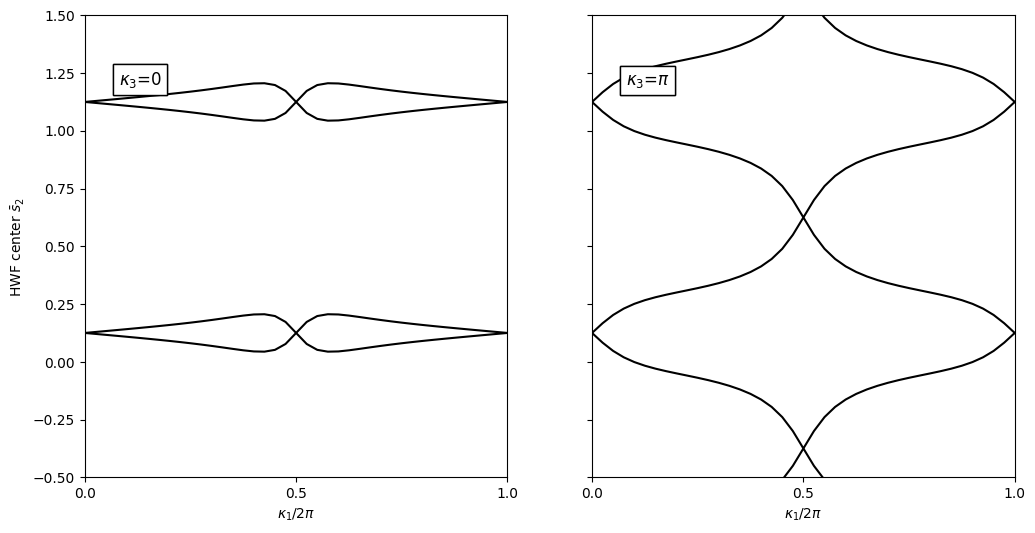

In [10]:
# initialize plot
fig, ax = plt.subplots(1,2,figsize=(12, 6), sharey=True)

for j in range(2):
  ax[j].set_xlim([0.,1.])
  ax[j].set_xticks([0.,0.5,1.])
  ax[j].set_xlabel(r"$\kappa_1/2\pi$")
  ax[j].set_ylim(-0.5,1.5)

  for n in range(2):
    for shift in [-1.,0.,1.]:
      ax[j].plot(np.linspace(0, 1, nk), hwfc[:, j, n]+shift, color='k')
    ax[j].text(0.08,1.20,labs[j],size=12.,bbox=dict(facecolor='w',edgecolor='k'))

ax[0].set_ylabel(r"HWF center $\bar{s}_2$")